In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

### Exploring Data

In [3]:
df = pd.read_csv('Clean_Dataset.csv')
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [4]:
df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [5]:
df.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [6]:
df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [7]:
df.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [8]:
df.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [9]:
df.arrival_time.value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [10]:
df['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [11]:
df['duration'].value_counts()

duration
2.17     4242
2.25     4036
2.75     2879
2.08     2755
2.83     2323
         ... 
37.17       1
38.75       1
38.50       1
36.25       1
41.50       1
Name: count, Length: 476, dtype: int64

In [12]:
df['duration'].min()

0.83

In [13]:
df['duration'].max()

49.83

In [14]:
df['duration'].median()

11.25

### Data Preprocessing

In [16]:
df = df.drop('Unnamed: 0',axis = 1)
df = df.drop('flight',axis = 1)
df['class'] = df['class'].apply(lambda x: 1 if x=='Business' else 0)
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,1,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,1,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,1,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,1,10.00,49,81585


In [17]:
df.stops = pd.factorize(df.stops)[0]

In [18]:
df.stops.value_counts()

stops
1    250863
0     36004
2     13286
Name: count, dtype: int64

In [19]:
df = df.join(pd.get_dummies(df.airline,dtype = int,prefix = 'airline')).drop('airline',axis=1)
df = df.join(pd.get_dummies(df.source_city,dtype = int,prefix = 'src')).drop('source_city',axis=1)
df = df.join(pd.get_dummies(df.destination_city,dtype = int,prefix = 'dst')).drop('destination_city',axis=1)
df = df.join(pd.get_dummies(df.arrival_time,dtype = int,prefix = 'arr_time')).drop('arrival_time',axis=1)
df = df.join(pd.get_dummies(df.departure_time,dtype = int,prefix = 'dep_time')).drop('departure_time',axis=1)
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arr_time_Evening,arr_time_Late_Night,arr_time_Morning,arr_time_Night,dep_time_Afternoon,dep_time_Early_Morning,dep_time_Evening,dep_time_Late_Night,dep_time_Morning,dep_time_Night
0,0,0,2.17,1,5953,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1,0,0,2.33,1,5953,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,0,0,2.17,1,5956,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,5955,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,2.33,1,5955,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
300149,1,1,10.42,49,77105,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
300150,1,1,13.83,49,79099,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
300151,1,1,10.00,49,81585,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


### Training Regression Model

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

x = df.drop('price',axis=1)
y = df['price']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [22]:
reg = RandomForestRegressor(n_jobs = -1)
reg.fit(x_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [23]:
reg.score(x_test,y_test)

0.9852573327354837

In [24]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = reg.predict(x_test)
print('r2: ',r2_score(y_test,y_pred))
print('MAE: ', mean_absolute_error(y_test,y_pred))
print('MSE: ',mean_squared_error(y_test,y_pred))
print('RMSE ',math.sqrt(mean_squared_error(y_test,y_pred)))


r2:  0.9852573327354837
MAE:  1084.7234739519504
MSE:  7615782.6105785
RMSE  2759.670743146454


Text(0, 0.5, 'Predicted values')

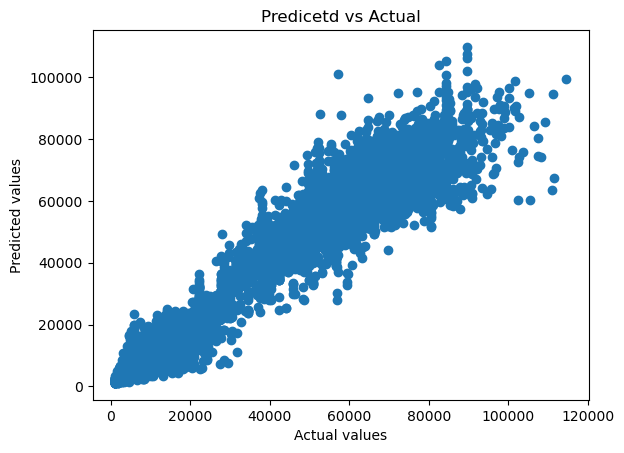

In [25]:
import matplotlib.pyplot as plt

plt.scatter(y_test,y_pred)
plt.title('Predicetd vs Actual')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

In [51]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arr_time_Evening,arr_time_Late_Night,arr_time_Morning,arr_time_Night,dep_time_Afternoon,dep_time_Early_Morning,dep_time_Evening,dep_time_Late_Night,dep_time_Morning,dep_time_Night
0,0,0,2.17,1,5953,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1,0,0,2.33,1,5953,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,0,0,2.17,1,5956,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,5955,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,2.33,1,5955,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
300149,1,1,10.42,49,77105,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
300150,1,1,13.83,49,79099,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
300151,1,1,10.00,49,81585,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
